# Table of Content

1.   [Category](#scrollTo=1ykgoBjNS7UC)
2.   [Manufacturer](#scrollTo=wkU2wOOOgM5c)
3.   [Competitors](#scrollTo=oRXNCvaXeEhS)
4.   [Price](#scrollTo=U4Ixn7TB2_B7)
5.   [Product Stocks](#scrollTo=Rpd50eImloHV)
6.   [Number of Reviews](#scrollTo=zq5kx9ywl4W2)
7.   [Average Rating Review](#scrollTo=gzXHRrjfre02)
8.   [Best Seller Rank](#scrollTo=rstvVc0fsjYO)
9.   [Number of Answered Questions](#scrollTo=fUNtbC3YzoqK)
10.  [Technical Detail in Product Information](#scrollTo=vANAGjv2uumu)
11.  [Length of Textual Data](#scrollTo=Y6K2YXI6MXN9)
12.  [Count of Numbers in Textual Data](#scrollTo=rIUatyII1AZ4)
13.  [What do Customers Ask?](#scrollTo=yofw_lkNs5_M)
14.  [Similarity Between Textual Data](#scrollTo=rtOghYC21Lrb)
15.  [Sales Predictions]()



# Imports

In [ ]:
!pip install session-info

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import warnings
from ast import literal_eval # Library for using columns as list after uploading 

# Libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import curve_fit  
# import sklearn's kmeans to deal with missing categories
from sklearn.cluster import KMeans
# See requirements
import session_info

ModuleNotFoundError: ignored

# Upload Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/walmart c1 bootcamp/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload main data
# Convert some columns into a list. If you don't use, their type is object.  
df = pd.read_csv(path + 'df_after_textual (1).csv', index_col=0, 
                 converters={'info_key_weight': literal_eval, 
                             'info_key': literal_eval, 
                             'desc_key_weight': literal_eval, 
                             'desc_key': literal_eval,
                             'ques_key_weight': literal_eval, 
                             'ques_weight': literal_eval, 
                             'answer_key_weight': literal_eval, 
                             'answer_key': literal_eval,
                             'ques_topic_list': literal_eval,
                             'ans_topic_list': literal_eval
                             })
# upload competitors data - This data from drive. 
df_comp = pd.read_csv(path + 'comp_df.csv', index_col=0)

In [ ]:
# FOR HANDE
# Upload main data
# Convert some columns into a list. If you don't use, their type is object.  
df = pd.read_csv('df_after_textual.csv', index_col=0, 
                 converters={'info_key_weight': literal_eval, 
                             'info_key': literal_eval, 
                             'desc_key_weight': literal_eval, 
                             'desc_key': literal_eval,
                             'ques_key_weight': literal_eval, 
                             'ques_weight': literal_eval, 
                             'answer_key_weight': literal_eval, 
                             'answer_key': literal_eval,
                             'ques_topic_list': literal_eval,
                             'ans_topic_list': literal_eval})
# upload competitors data - This data from drive. 
df_comp = pd.read_csv('comp_df.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (65,66,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# the dimension of dataframe
print('The shape of df:')
print(df.shape)
print()
print('The shape of df_comp:') 
print(df_comp.shape) # We won't use all columns.

The shape of df:
(10000, 113)

The shape of df_comp:
(10000, 4137)


# 1. Categories

There are catergories that came from the original `category_and_sub_category` feature, but there are different categories inside the `product_information` feature. We need to see how they compare and choose the bext to use:

In [ ]:
# How many missing values in product information column?
df['product_information'].isna().sum()

58

In [ ]:
# The main categories which were extracted from product information. 
df['main_cate'].value_counts(dropna=False)

Toys & Games             9842
NaN                       134
Kitchen & Home             14
Baby                        2
Car & Motorbike             2
Office Products (See        2
Garden & Outdoors           1
Grocery                     1
Computers                   1
DIY & Tools                 1
Name: main_cate, dtype: int64

In [ ]:
print(f"How many products' information contains 'Toys & Games': {df['product_information'].str.contains('Toys & Games').sum()}")
print(f"How many products have Best Sellers Rank: {10000 - df['best_seller_rank'].isna().sum()}")
print(f"How many products: Info contains 'Toys & Games AND 'Best seller rank': {df[(df['product_information'].str.contains('Toys & Games')==True)&(df['best_seller_rank'].isna()==False)].shape[0]}")

How many products' information contains 'Toys & Games': 9852
How many products have Best Sellers Rank: 9866
How many products: Info contains 'Toys & Games AND 'Best seller rank': 9852


In [ ]:
# These products' info contains 'Toys & Games' but their main category is different from Toys & Games.
df[(df['product_information'].str.contains('Toys & Games')==True)&(df['main_cate']!='Toys & Games ')].index

Int64Index([224, 1601, 1761, 4514, 4834, 5125, 9282, 9397, 9489, 9541], dtype='int64')

In [ ]:
# Check products which contains 'Toys & Games' but their main category is different
df['product_information'][1601]

'Technical Details Brand FunkyBuys Model Numbervelocitytyre-42    Additional Information ASINB00ZNKIZH2 Best Sellers Rank 855,871 in Kitchen & Home (See top 100) #505 in Toys & Games > Sports Toys & Outdoor > Beach Toys > Airbeds & Inflating Devices #1050287 in Home & Garden > Kitchen & Home Delivery Destinations: Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available 14 Jun. 2015   '

## 1.1 Deciding Subcategories

In [ ]:
# remove trailing space from columns
df['category'] = df['category'].str.strip()
for i in range(1,5):
  df[f'sub_category{i}'] = df[f'sub_category{i}'].str.strip()
for i in range(1,9):
  df[f'pi_sub_category{i}'] = df[f'pi_sub_category{i}'].str.strip()

# print
print("How many products in Toys & Games have same 'category' and pi_sub_category1?")
df[(df['product_information'].str.contains('Toys & Games')==True) & (df['category'] == df['pi_sub_category1'])].shape[0]

How many products in Toys & Games have same 'category' and pi_sub_category1?


4765

In [ ]:
print('Conversely, how many sub category1 are related to pi_sub_category2?')
df[df['sub_category1'] == df['pi_sub_category2']].shape[0]

Conversely, how many sub category1 are related to pi_sub_category2?


5201

In [ ]:
# plot distributions for top 10 categories
fig = make_subplots(rows=2, cols=2, 
                    vertical_spacing=0.5, row_heights=[1000,1000])

trace0 = go.Histogram(x=df['category'])
trace1 = go.Histogram(x=df['sub_category1'])
trace2 = go.Histogram(x=df['pi_sub_category1'])
trace3 = go.Histogram(x=df['pi_sub_category2'])

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.update_xaxes(categoryorder='max descending',)
fig.update_layout(height=800, showlegend=False)
fig.show()


In [ ]:
# Filter data which are in Toys & Games:
# Get 20 samples from data
df[df['product_information'].str.contains('Toys & Games')==True][['category','sub_category1','main_cate', 'pi_sub_category1']].sample(20)

# Note: category and sub_category1 generated from raw df['category_and_sub_category']
# Note: main_cate	and pi_sub_category1 generated from df['product_information']

,category,sub_category1,main_cate,pi_sub_category1
2323,Hobbies,Remote Controlled Devices,Toys & Games,NaN
6342,Musical Toy Instruments,Wind & Brass,Toys & Games,Musical Toy Instruments
3052,Party Supplies,Decorations,Toys & Games,Party Supplies
2172,Hobbies,"Slot Cars, Race Tracks & Accessories",Toys & Games,NaN
1946,Fancy Dress,Accessories,Toys & Games,Dressing Up
8043,Dolls & Accessories,Soft Dolls,Toys & Games,Dolls & Accessories
9786,Games,Dice & Dice Games,Toys & Games,Games
7191,Sports Toys & Outdoor,Kites & Flight Toys,Toys & Games,Sports Toys & Outdoor
8509,Die-Cast & Toy Vehicles,Toy Vehicles & Accessories,Toys & Games,NaN
4346,Die-Cast & Toy Vehicles,Toy Vehicles & Accessories,Toys & Games,NaN


It is easy to see that there seems to be a misalignment on the categories of our dataset and the ones at the `product_information` feature. We'll try to identify the logic behind it with some dataviz:

In [ ]:
fig = px.density_heatmap(df, x='category', y='pi_sub_category1', width=900, height=600)
fig.show()

In [ ]:
# Now between subcategories:
fig = px.density_heatmap(df, x='sub_category1', y='pi_sub_category1', width=900, height=600)
fig.show()

In [ ]:
# Now looking specifically at Hobbies (most frequent subcategory)
hobbies_df = df[df['category'] == 'Hobbies']
fig = px.density_heatmap(hobbies_df, x='sub_category1', 
                         y='pi_sub_category1', width=600, height=600)
fig.show()

In [ ]:
# Now looking specifically at Die-Cast & Toy Vehicles (2nd most frequent):
hobbies_df = df[df['category'] == 'Die-Cast & Toy Vehicles']
fig = px.density_heatmap(hobbies_df, x='sub_category1', y='pi_sub_category1', width=600, height=600)
fig.show()

We can see that sometimes the original `product_information` feature describes the product in a better way, while sometimes `category_and_subcategory` is more descriptive. We decided to use the latter because it has less missing rows. Case this feature turns out to the very relevant during our modeling efforts, we may revisit this decision.

### *How to fill missing categories?*

In [ ]:
print("How many products have missing data in 'category' feature?")
print(df['category'].isna().sum())
print()
print("How many products have missing data in 'pi_sub_category1' feature?")
print(df['pi_sub_category1'].isna().sum())

How many products have missing data in 'category' feature?
690

How many products have missing data in 'pi_sub_category1' feature?
1882


**NOTE** We can use the category which is extracted from raw data df['category_and_sub_category']. Already about half of them is same as pi_sub_category1. We chose 'category' because this feature have less missing values. Besides we use general Best seller Rank, not category specific ranking.

To fill missing in df['category'] we can use df['pi_sub_category1'].There are 9 products whose both column is missing. we can impute them by examininf other columns.

In [ ]:
# Create a new CATEGORY column for using in EDA and modeling
# Fill missing values with pi_sub_category1
df['category_eda'] = df['category'].fillna(df['pi_sub_category1'])

In [ ]:
# What are the categories?
df['category_eda'].value_counts(dropna = False)

Hobbies                                                1464
Die-Cast & Toy Vehicles                                1221
Figures & Playsets                                     1112
Characters & Brands                                     960
Games                                                   943
Arts & Crafts                                           803
Party Supplies                                          694
Fancy Dress                                             585
Sports Toys & Outdoor                                   377
Dolls & Accessories                                     371
Soft Toys                                               345
Jigsaws & Puzzles                                       274
Puppets & Puppet Theatres                               271
Building & Construction Toys                            200
Baby & Toddler Toys                                     106
Advent Calendars                                         97
Pretend Play                            

### *Correct Mislabeled Categories*

In [ ]:
# There are two incorrectly labeled categories. Let's correct them.
inds = df[df['category_eda'].isin(['Building & Construction Toys #2179 in Toys & Games', 'Building & Construction Toys #13356 in Toys & Games'])].index

# replace with 'Building & Construction Toys
for i in inds:
  df.loc[i, 'category_eda'] = 'Building & Construction Toys'


### *Impute Missing Categories*

In [ ]:
print('How many missing data after filling with pi_sub_category1')
print(df['category_eda'].isna().sum())
print()
# After filling get the index of missing values
df[df['category_eda'].isna()].index

How many missing data after filling with pi_sub_category1
26



Int64Index([  71,  622, 1071, 1307, 1655, 1966, 2273, 2543, 2878, 2971, 3193,
            3606, 3649, 5149, 5156, 5369, 5381, 5433, 6073, 6452, 6567, 7206,
            9434, 9445, 9936, 9961],
           dtype='int64')

**NOTE:** There are missing categories for 26 products. We will impute these missing values by examining manufacturer, product description etc. 

In [ ]:
# Impute missing categories manually
df.loc[71, 'category_eda'] = 'Die-Cast & Toy Vehicles' # POWER CITY TRAINS -  Power City Trains Auto Loader City
df.loc[622, 'category_eda'] = 'Arts & Crafts' # manufacturer -- Kinetic Sand
df.loc[1071, 'category_eda'] = 'Figures & Playsets' # manufacturer -- DC Comics
df.loc[1307, 'category_eda'] = 'Fancy Dress' # Trendy Bead Tattoos
df.loc[1655, 'category_eda'] = 'Sports Toys & Outdoor' # Swimming pool
df.loc[1966, 'category_eda'] = 'Fancy Dress' # Tattoo
df.loc[2273, 'category_eda'] = 'Hobbies' # manufacturer ==> Tamiya
df.loc[2543, 'category_eda'] = 'Building & Construction Toys' # from amazon.co.uk
df.loc[2878, 'category_eda'] = 'Characters & Brands' # manufacturer ==> Hasbro
df.loc[2971, 'category_eda'] = 'Party Supplies' # manufacturer => Belbal
df.loc[3193, 'category_eda'] = 'Fancy Dress' # manufacturer => Morphsuits
df.loc[3606, 'category_eda'] = 'Hobbies' # manufacturer ==> Tamiya
df.loc[3649, 'category_eda'] = 'Hobbies' # manufacturer ==> Tamiya
df.loc[5149, 'category_eda'] = 'Party Supplies' # manufacturer ==> Amscan
df.loc[5156, 'category_eda'] = 'Games' # manufacturer ==> Steve Jackson Games
df.loc[5369, 'category_eda'] = 'Games' # manufacturer ==> Steve Jackson Games
df.loc[5381, 'category_eda'] = 'Games' # manufacturer ==> Top Trumps
df.loc[5433, 'category_eda'] = 'Games' # description ==> Playing Cards
df.loc[6073, 'category_eda'] = 'Figures & Playsets' # manufacturer => Papo
df.loc[6452, 'category_eda'] = 'Figures & Playsets' # description => Japanese figures
df.loc[6567, 'category_eda'] = 'Arts & Crafts' # description => Colorful Pencils
df.loc[7206, 'category_eda'] = 'Gardening' # description => Garden
df.loc[9434, 'category_eda'] = 'Games' # description => Board Game
df.loc[9445, 'category_eda'] = 'Other' # No manufacturer, description and meaningful info
df.loc[9936, 'category_eda'] = 'Jigsaws & Puzzles' # Manufacturer => HCM Kinzel
df.loc[9961, 'category_eda'] = 'Characters & Brands' # Manufacturer => Noble Collection

In [ ]:
# Label the categories whose frequency is less than 10
need = df['category_eda'].value_counts().index[:19]
df['category_eda'] = np.where(df['category_eda'].isin(need), df['category_eda'], 'Other')

# The missing values are labeled as OTHER.
df['category_eda'].value_counts()

Hobbies                         1467
Die-Cast & Toy Vehicles         1222
Figures & Playsets              1115
Characters & Brands              962
Games                            948
Arts & Crafts                    805
Party Supplies                   696
Fancy Dress                      588
Sports Toys & Outdoor            378
Dolls & Accessories              371
Soft Toys                        345
Jigsaws & Puzzles                275
Puppets & Puppet Theatres        271
Building & Construction Toys     203
Baby & Toddler Toys              106
Advent Calendars                  97
Other                             74
Pretend Play                      47
Musical Toy Instruments           19
Novelty & Special Use             11
Name: category_eda, dtype: int64

### *The Number of Products According to Categories*

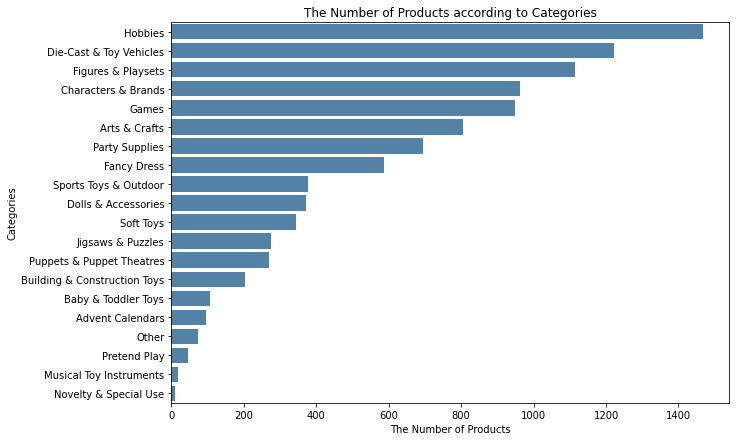

In [ ]:
# the number of customer questions accordng to categories
plt.figure(figsize=(10,7)) 
ax = sns.countplot(data = df, y='category_eda', order = df['category_eda'].value_counts().index, color='steelblue')
ax.set_title('The Number of Products according to Categories')
ax.set_xlabel("The Number of Products")
ax.set_ylabel("Categories")
plt.show()

# 2. Manufacturers

In [ ]:
print(f"There are {df['manufacturer'].nunique()} manufacturers in dataset.")

There are 2651 manufacturers in dataset.


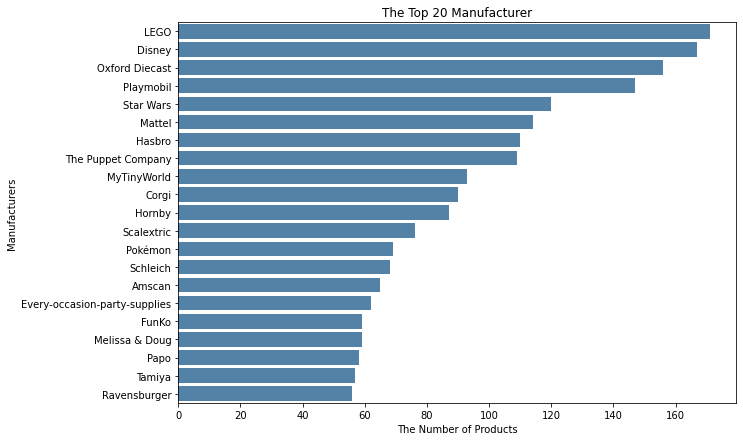

In [ ]:
# Top 20 manufacturers
plt.figure(figsize=(10,7)) 
ax = sns.countplot(data=df, y='manufacturer', order=df['manufacturer'].value_counts().iloc[:21].index, color='steelblue')
ax.set_title('The Top 20 Manufacturer')
ax.set_xlabel("The Number of Products")
ax.set_ylabel("Manufacturers")
plt.show()

# 3. Competitors 

In [ ]:
# Add new columns: Average price of sellers, #_of_competitors
df_comp.insert(0, 'competitors_avg_price', round(df_comp.mean(axis=1),2))
df_comp.insert(0, 'competitors_count', df_comp.iloc[:, 1:].notna().sum(axis=1))

# Concat first 3 columns of df_comp to main df
df = pd.concat([df, df_comp[['competitors_count',	'competitors_avg_price',	'OnlineRetail.co.uk']]], axis=1)

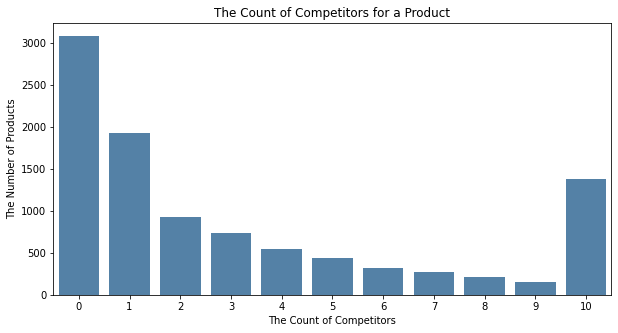

In [ ]:
plt.figure(figsize=(10,5)) 
ax = sns.countplot(data = df, x = 'competitors_count',  color='steelblue')
ax.set_title('The Count of Competitors for a Product')
ax.set_xlabel("The Count of Competitors")
ax.set_ylabel("The Number of Products")
plt.show()

# 4. Price


In [ ]:
# Describe price column
print(df['price'].describe())
# The missing values in price column
print()
print(f"The number of missing values in price column: {df['price'].isna().sum()}")

count    8547.000000
mean       20.251406
std        46.314450
min         0.010000
25%         4.990000
50%        10.560000
75%        19.990000
max      2439.920000
Name: price, dtype: float64

The number of missing values in price column: 1453


**Note:** There are 1453 missing values for product price. We will impute missing values with
* 'OnlineRetail.co.uk' price from competitors 
* The average price of competitors
* The average price of sub-category

But first we will create a new column that shows the price is from original data or inferred/imputed price.

In [ ]:
# Create a new column that shows inferred price
df['inferred-price'] = np.where(df['price'].isna(), 1, 0) # 1 means 'price' is inferred, 0 means original price
# Fill the missing values 
df['price'] = df['price'].fillna(df['OnlineRetail.co.uk']).fillna(df['competitors_avg_price'])
df['price'] = df['price'].fillna(df.groupby('category_eda').price.transform('mean'))
# The missing values in price column
print()
print(f"The number of missing values in price column after imputing: {df['price'].isna().sum()}")
# Let's look the descriptive statistics
print()
print(df['price'].describe())


The number of missing values in price column after imputing: 0

count    10000.000000
mean        25.394045
std         56.227751
min          0.010000
25%          5.690000
50%         12.500000
75%         26.407500
max       2439.920000
Name: price, dtype: float64


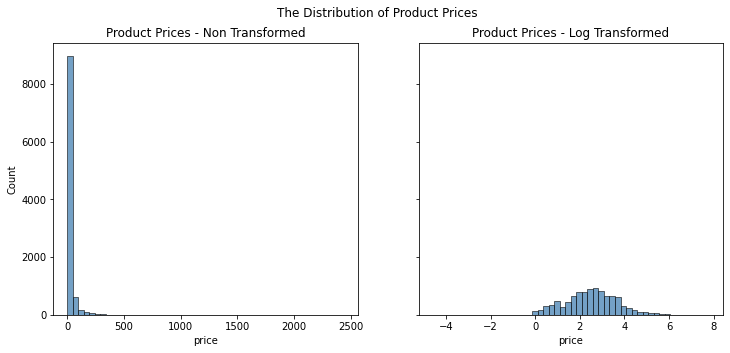

In [ ]:
# Generate the plots for distribution of prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('The Distribution of Product Prices')
# Non-tran
sns.histplot(ax=axes[0], x=df['price'], bins=50, color='steelblue')
axes[0].set_title('Product Prices - Non Transformed')
# Log transformation
sns.histplot(ax=axes[1], x=np.log(df['price']), bins=50, color='steelblue')
axes[1].set_title('Product Prices - Log Transformed')
plt.show()

# 5. Product Stocks

In [ ]:
# Get the descriptive statistic of price according to stock type 
round(df.groupby(by='type_of_stock')['price'].agg(['count', 'min', 'mean', 'std', 'max']),2)

,count,min,mean,std,max
type_of_stock,,,,,
Collectible,13,3.99,25.60,13.60,43.15
New,7324,0.29,26.40,57.35,2439.92
No stock,2500,0.01,21.73,50.11,899.99
Refurbished,2,36.62,51.92,21.64,67.22
Used,161,2.99,36.26,86.07,995.11


# 6. Number of Reviews

In [ ]:
df['number_of_reviews'].describe()

count    10000.0000
mean         9.1235
std         33.7000
min          0.0000
25%          1.0000
50%          2.0000
75%          6.0000
max       1399.0000
Name: number_of_reviews, dtype: float64

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



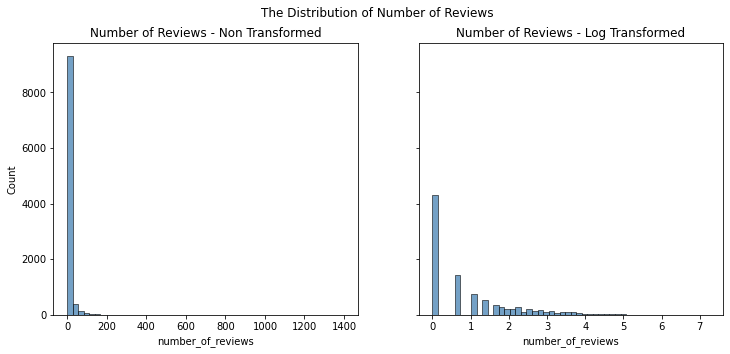

In [ ]:
# Generate the plots for distribution of prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('The Distribution of Number of Reviews')
# Non-tran
sns.histplot(ax=axes[0], x=df['number_of_reviews'], bins=50, color='steelblue')
axes[0].set_title('Number of Reviews - Non Transformed')
# Log transformation
sns.histplot(ax=axes[1], x=np.log(df['number_of_reviews']), bins=50, color='steelblue')
axes[1].set_title('Number of Reviews - Log Transformed')
plt.show()

*Total Number of Reviews according to categories*

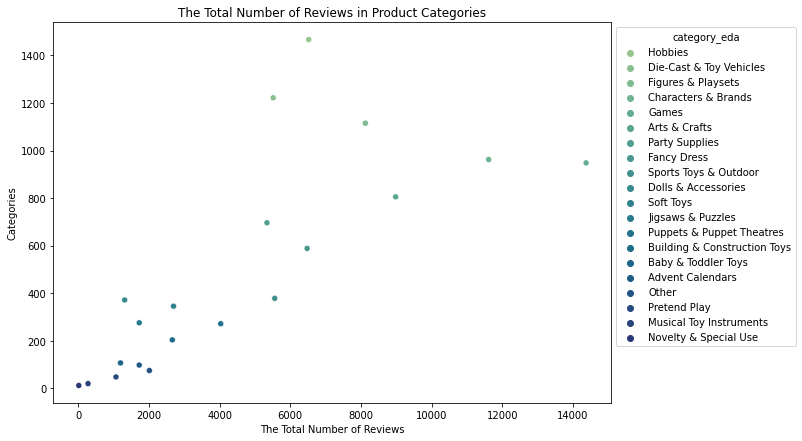

In [ ]:
df_plot = df.groupby(by='category_eda')['number_of_reviews'].agg(['count', 'sum']).sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(10,7)) 
ax = sns.scatterplot(data = df_plot, y='count', x = 'sum', hue='category_eda',palette='crest' )

ax.set_title('The Total Number of Reviews in Product Categories')
ax.set_xlabel("The Total Number of Reviews")
ax.set_ylabel("Categories")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# 7. Average Review Ratings

In [ ]:
df['average_review_rating'].isna().sum()

18

In [ ]:
# Fill 'average_review_rating' with the median of category rating

df['average_review_rating'] = df['average_review_rating'].fillna(df.groupby('category_eda').average_review_rating.transform('median'))

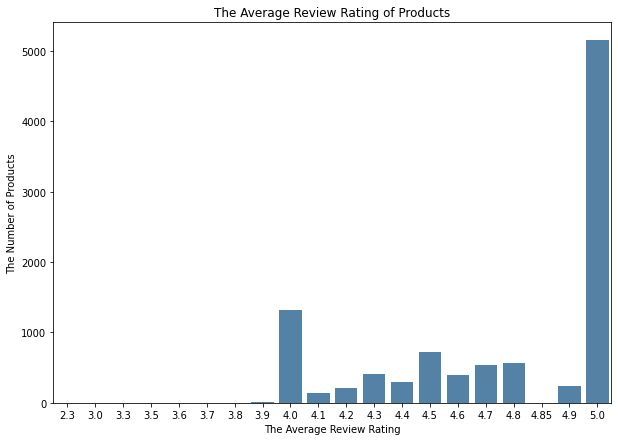

In [ ]:
plt.figure(figsize=(10,7)) 
ax = sns.countplot(data = df, x='average_review_rating', color='steelblue')
ax.set_title('The Average Review Rating of Products')
ax.set_xlabel("The Average Review Rating")
ax.set_ylabel("The Number of Products")
plt.show()

# 8. Best Seller Rank

In [ ]:
df['best_seller_rank'].describe().apply(lambda x: format(x, 'f')) # Surpass scientific notation

count       9866.000000
mean      253012.955200
std       252019.022852
min           14.000000
25%        68010.500000
50%       172236.000000
75%       357147.250000
max      2257465.000000
Name: best_seller_rank, dtype: object

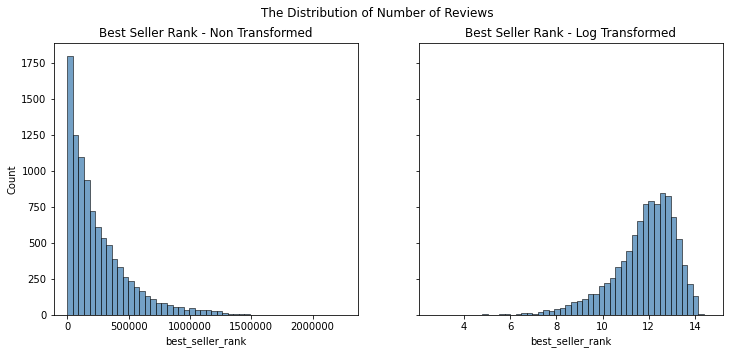

In [ ]:
# Generate the plots for distribution of prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('The Distribution of Number of Reviews')
# Non-tran
sns.histplot(ax=axes[0], x=df['best_seller_rank'], bins=50, color='steelblue')
axes[0].set_title('Best Seller Rank - Non Transformed')
axes[0].ticklabel_format(style='plain', axis='x',useOffset=False) #surpass scientific notation
# Log transformation
sns.histplot(ax=axes[1], x=np.log(df['best_seller_rank']), bins=50, color='steelblue')
axes[1].set_title('Best Seller Rank - Log Transformed')
plt.show()

*Best Seller Rank of Products according to categories*

In [ ]:
# # plotly
fig = go.Figure()
cate_list = df['category_eda'].value_counts().index

# Loop through the suburbs
for categories in cate_list:
  	# Subset the DataFrame
    df_sub = df[df['category_eda'] == categories]
    # Add a trace for each suburb subset
    fig.add_trace(go.Box(
                   x=df_sub['best_seller_rank'],
                   name=categories))

updatemenu = []
buttons = []
    
# Create the buttons
i = 0
for categories in cate_list:
  visible_list = [False]*20
  visible_list[i] = True
  buttons.append({'label': categories, 'method': "update", 'args': [{"visible": visible_list}, {'title': categories}]})
  i += 1

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

In [ ]:
# create best seller rank buckets for each 50k rank 
df['bsr_bucket'] = df[df['best_seller_rank'].isna() == False]['best_seller_rank'].apply(lambda x : int(x/50000)+1)

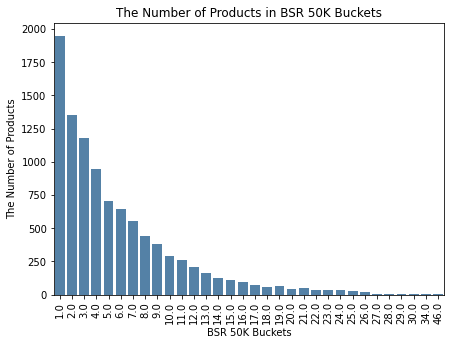

In [ ]:
plt.figure(figsize=(7,5)) 
ax = sns.countplot(data = df, x='bsr_bucket', color='steelblue')
ax.set_title('The Number of Products in BSR 50K Buckets')
ax.set_xlabel("BSR 50K Buckets")
ax.set_ylabel("The Number of Products")
ax.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
dfg = df.groupby(by = 'category_eda')['best_seller_rank'].mean()
dfg = dfg.sort_values()
dfg

category_eda
Musical Toy Instruments         129387.789474
Pretend Play                    175251.025000
Party Supplies                  179684.510854
Games                           181852.232979
Novelty & Special Use           186346.363636
Jigsaws & Puzzles               190929.102564
Building & Construction Toys    194404.118812
Puppets & Puppet Theatres       194579.433333
Baby & Toddler Toys             214873.190476
Characters & Brands             221128.817518
Arts & Crafts                   225635.764339
Sports Toys & Outdoor           227324.554645
Figures & Playsets              233806.307484
Fancy Dress                     241794.375671
Soft Toys                       243418.539130
Other                           254745.573529
Advent Calendars                276655.175258
Hobbies                         330185.915395
Die-Cast & Toy Vehicles         341786.141785
Dolls & Accessories             374981.880759
Name: best_seller_rank, dtype: float64

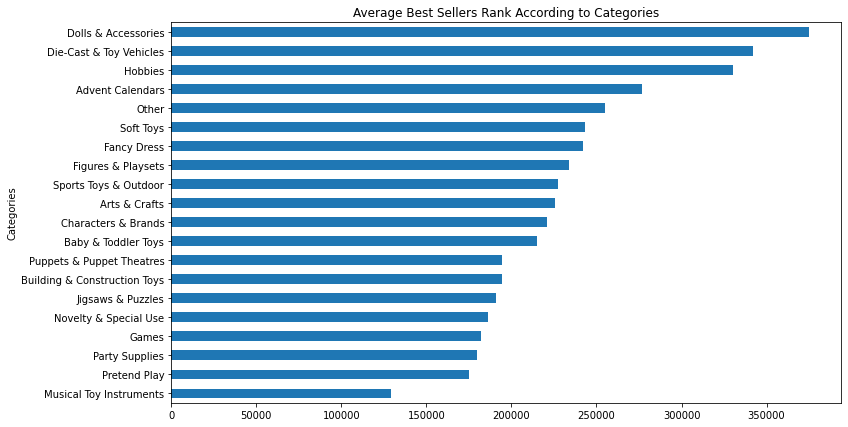

In [ ]:
dfg.plot(kind='barh', title='Average Best Sellers Rank According to Categories', ylabel='Best Sellers Rank',
         xlabel='Categories', figsize=(12, 7))
plt.show()

# 9. Number of Answered Questions

In [ ]:
df['number_of_answered_questions'].mean()

1.695

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



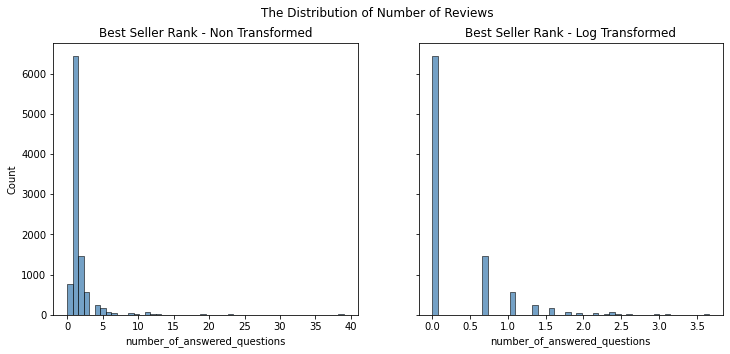

In [ ]:
# Generate the plots for distribution of prices
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('The Distribution of Number of Reviews')
# Non-tran
sns.histplot(ax=axes[0], x=df['number_of_answered_questions'], bins=50, color='steelblue')
axes[0].set_title('Best Seller Rank - Non Transformed')
axes[0].ticklabel_format(style='plain', axis='x',useOffset=False) #surpass scientific notation
# Log transformation
sns.histplot(ax=axes[1], x=np.log(df['number_of_answered_questions']), bins=50, color='steelblue')
axes[1].set_title('Best Seller Rank - Log Transformed')
plt.show()

*The Number of Customer Questions According to Categories*

In [ ]:
# Get descriptive statistics of # of customer questions
df.groupby(by='category_eda')['number_of_answered_questions'].agg(['min', 'mean', 'std', 'max']).sort_values(by='mean')

,min,mean,std,max
category_eda,,,,
Puppets & Puppet Theatres,0,1.147601,0.765206,5
Musical Toy Instruments,0,1.210526,0.713283,2
Soft Toys,0,1.243478,0.761630,5
Jigsaws & Puzzles,0,1.389091,1.142042,6
Dolls & Accessories,0,1.485175,2.138873,11
Games,0,1.527426,1.430652,13
Die-Cast & Toy Vehicles,0,1.536007,1.711338,13
Novelty & Special Use,1,1.545455,0.687552,3
Figures & Playsets,0,1.547982,1.525423,12


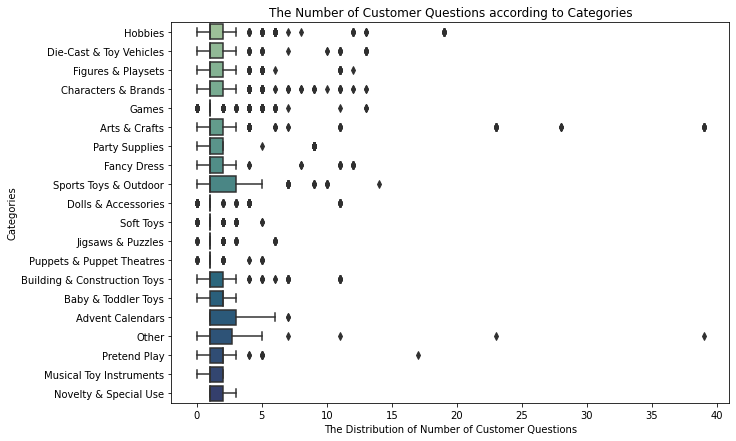

In [ ]:
plt.figure(figsize=(10,7)) 
ax = sns.boxplot(data = df, y='category_eda', x = df['number_of_answered_questions'], order =  df['category_eda'].value_counts().index, palette='crest' )
ax.set_title('The Number of Customer Questions according to Categories')
ax.set_xlabel("The Distribution of Number of Customer Questions")
ax.set_ylabel("Categories")
plt.show()

# 10. Technical Details in Product Information

*The Number of Technical Details in Product Information according to Categories*

In [ ]:
df['#_tech_details'].mean()/26

0.6700576923076924

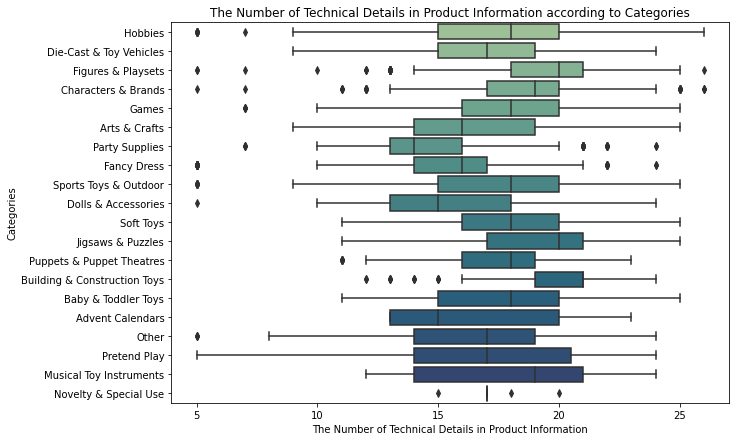

In [ ]:
plt.figure(figsize=(10,7)) 
ax = sns.boxplot(data = df, y='category_eda', x = df['#_tech_details'], order =  df['category_eda'].value_counts().index, palette='crest' )
ax.set_title('The Number of Technical Details in Product Information according to Categories')
ax.set_xlabel("The Number of Technical Details in Product Information")
ax.set_ylabel("Categories")
plt.show()

# 11. Lengths of Textual Data

In [ ]:
df[df['customer_questions_and_answers'].isna()==False]['ave_length_question'].mean()

11.561165381542843

In [ ]:
df[df['customer_questions_and_answers'].isna()==False]['ave_length_answers'].mean()

20.491865947691988

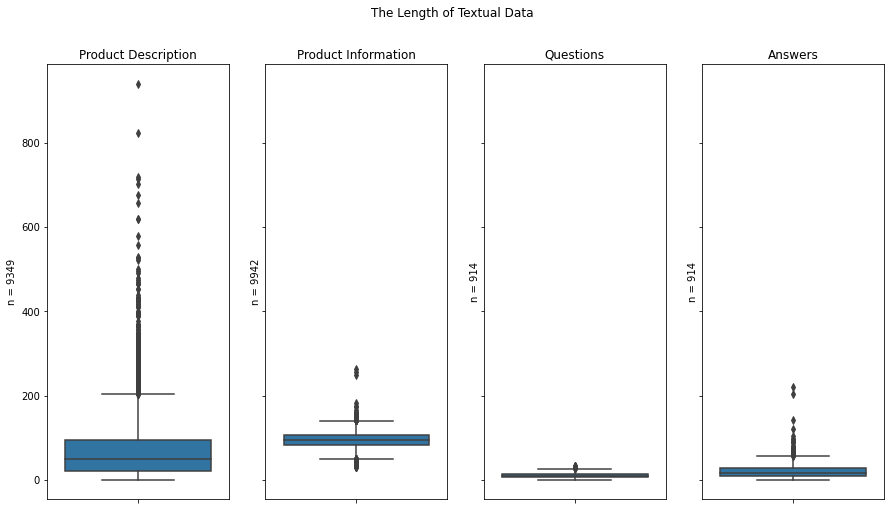

In [ ]:
# Generate the sublot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 8), sharey=True)
# title of plot
fig.suptitle('The Length of Textual Data')

sns.boxplot(ax=axes[0], y=df[df['description'].isna()==False]['desc_len'])
sns.boxplot(ax=axes[1], y=df[df['product_information'].isna()==False]['info_len'])
sns.boxplot(ax=axes[2], y=df[df['customer_questions_and_answers'].isna()==False]['ave_length_question'])
sns.boxplot(ax=axes[3], y=df[df['customer_questions_and_answers'].isna()==False]['ave_length_answers'])

axes[0].set_title('Product Description')
axes[1].set_title('Product Information')
axes[2].set_title('Questions')
axes[3].set_title('Answers')

axes[0].set_ylabel(f"n = {df[df['description'].isna()==False].shape[0]}")
axes[1].set_ylabel(f"n = {df[df['product_information'].isna()==False]['info_len'].shape[0]}")
axes[2].set_ylabel(f"n = {df[df['customer_questions_and_answers'].isna()==False].shape[0]}")
axes[3].set_ylabel(f"n = {df[df['customer_questions_and_answers'].isna()==False].shape[0]}")

plt.show()

In [ ]:
fig = make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(go.Box(y=df[df['description'].isna()==False]['desc_len'],name ='Description'),row=1, col=1)
fig.add_trace(go.Box(y=df[df['product_information'].isna()==False]['info_len'], name ='Product Information'),row=1, col=2)
fig.add_trace(go.Box(y=df[df['customer_questions_and_answers'].isna()==False]['ave_length_question'], name='Question'),row=1, col=3)
fig.add_trace(go.Box(y=df[df['customer_questions_and_answers'].isna()==False]['ave_length_answers'], name='Answer'),row=1, col=4)

fig.update_layout(height=600, width=1200, title_text="The Length of Textual Data")
fig.show()

# 12. Count of Numbers in Textual Data

In [ ]:
fig = make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(go.Box(y=df[df['description'].isna()==False]['desc_#_numb'],name ='Description'),row=1, col=1)
fig.add_trace(go.Box(y=df[df['product_information'].isna()==False]['info_#_numb'], name ='Product Information'),row=1, col=2)
fig.add_trace(go.Box(y=df[df['customer_questions_and_answers'].isna()==False]['que_#_numb'], name='Question'),row=1, col=3)
fig.add_trace(go.Box(y=df[df['customer_questions_and_answers'].isna()==False]['ans_#_numb'], name='Answer'),row=1, col=4)

fig.update_layout(height=600, width=1200, title_text="The Count of Numbers of Textual Data")
fig.show()

# 13. What do customers ask?


## 13.1 The Question Topics

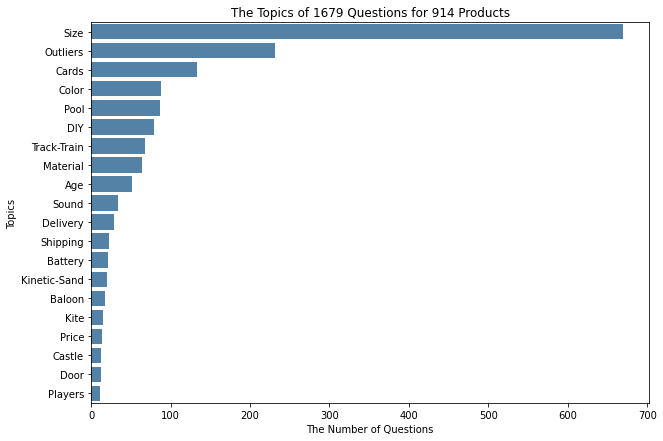

In [ ]:
# Upload the question_topics.csv to see the countplot
df_topic = pd.read_csv('question_topics.csv', index_col = 0)

# the number of customer questions accordng to categories
plt.figure(figsize=(10,7)) 
ax = sns.countplot(data = df_topic, y='topic_name_imputed', order = df_topic['topic_name_imputed'].value_counts().index, color='steelblue')
ax.set_title('The Topics of 1679 Questions for 914 Products')
ax.set_xlabel("The Number of Questions")
ax.set_ylabel("Topics")
plt.show()

**NOTE:** df['ques_topic_list'] shows all topics for a product in a list. I want to create new topic columns that show the number of topics per questions. Kinda encoding.

In [ ]:
# list of question topics (question topics for each questions are stored in question_topcis.csv file)
topic_list_q = ['Size', 'Sound', 'Outliers', 'Track-Train', 'Material', 'Shipping',
       'Color', 'Castle', 'DIY', 'Price', 'Age', 'Players', 'Cards',
       'Kinetic-Sand', 'Pool', 'Door', 'Delivery', 'Battery', 'Baloon',
       'Kite']

# Create columns for question topics
for topic in topic_list_q:
    df[f"{topic}_q_topic"] = 0

In [ ]:
# Count the number of topic for each question
for row in range(len(df)):
  for topic in topic_list_q:
    for i in df.loc[row, 'ques_topic_list']:
      if i == topic:
        df.loc[row, f"{topic}_q_topic"] += 1

## 13.2 Can Customers Find What They Ask in Product Information?

**SIZE**

In [ ]:
# Generate a new column that shows if the product has a question that is related to SIZE
df['size_key'] = df['ques_key_914'].apply(lambda x: any(keyword in x for keyword in ['size', 'fit', 'dimensions', 'big',
                                                 'long', 'tall', 'cm', 'height']))

# replace 1 and 0 with their meanings
df['size_key'] = np.where(df['size_key'] == True, "Question that mentions size" , "Question that doesn't mention size")

# Generate a new column that shows there is a color detail in product information
df['dimension_2'] = np.where(df['dimension'].isna() == True, "Information doesn't include size", "Information includes size")

# Print the values of "color_key"
df['size_key'].value_counts()

Question that doesn't mention size    9796
Question that mentions size            204
Name: size_key, dtype: int64

In [ ]:
# Create 3 dataframes 

# df1 => Products with Question Text
df1 = df[(df['size_key'] == 'Question that mentions size')]['dimension_2'].value_counts(normalize=True).mul(100).sort_index()
# df2 => Products with Zero Question
k = df[(df['size_key'] != 'Question that mentions size')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))].shape[0]
df2 = df[(df['size_key'] != 'Question that mentions size')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))]['dimension_2'].value_counts(normalize=True).mul(100).sort_index()
# df3 => Products with Missing Question Text
df3 = df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())]['dimension_2'].value_counts(normalize=True).mul(100).sort_index()

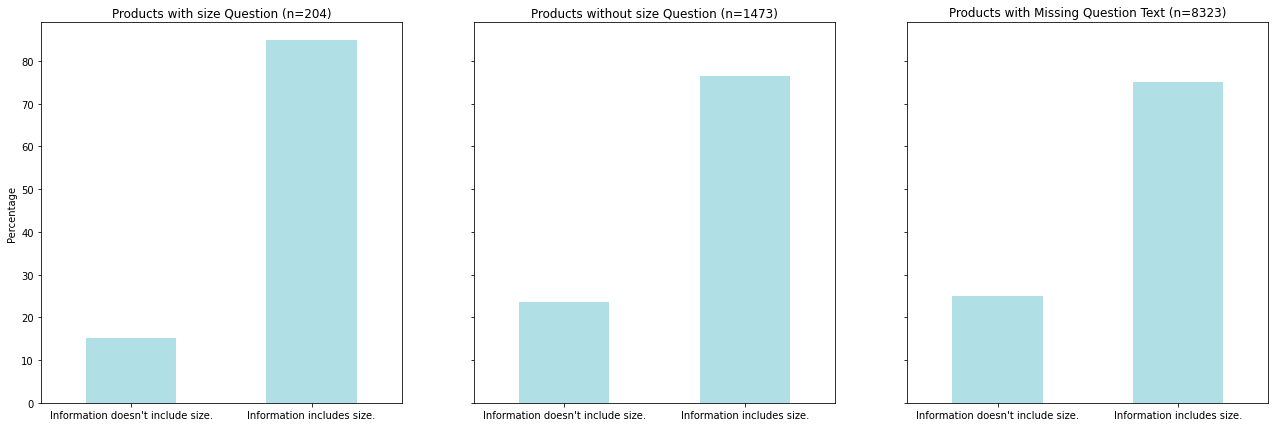

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), sharey = True)

df1.plot(ax=axes[0], kind='bar', color='powderblue')
df2.plot(ax=axes[1], kind = 'bar', color='powderblue')
df3.plot(ax=axes[2], kind = 'bar', color='powderblue')

axes[0].title.set_text(f"Products with size Question (n={df[df['size_key'] == 'Question that mentions size'].shape[0]})")
axes[1].title.set_text(f"Products without size Question (n={k})")
axes[2].title.set_text(f"Products with Missing Question Text (n={df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())].shape[0]})")


axes[0].set(xlabel=None, ylabel='Percentage')
for i in range(3):
  axes[i].set_xticklabels(["Information doesn't include size.", "Information includes size."], rotation=0)
plt.show()

**COLOR**

In [ ]:
# Generate a new column that shows if the product has a question that is related to color
df['color_key'] = df['ques_key_914' # Column that shows the keywords for questions
                     ].apply(lambda x: any(keyword in x for keyword in ['colour']))

# replace 1 and 0 with their meanings
df['color_key'] = np.where(df['color_key'] == True, "Question that mentions color" , "Question that doesn't mention color")

# Generate a new column that shows there is a color detail in product information
df['color_2'] = np.where(df['color'].isna() == True, "Information doesn't include color", "Information includes color")

# Print the values of "color_key"
df['color_key'].value_counts()

Question that doesn't mention color    9974
Question that mentions color             26
Name: color_key, dtype: int64

In [ ]:
# Create 3 dataframes 

# df1 => Products with Question Text
df1 = df[(df['color_key'] == 'Question that mentions color')]['color_2'].value_counts(normalize=True).mul(100).sort_index()
# df2 => Products with Zero Question
k = df[(df['color_key'] != 'Question that mentions color')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))].shape[0]
df2 = df[(df['color_key'] != 'Question that mentions color')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))]['color_2'].value_counts(normalize=True).mul(100).sort_index()
# df3 => Products with Missing Question Text
df3 = df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())]['color_2'].value_counts(normalize=True).mul(100).sort_index()

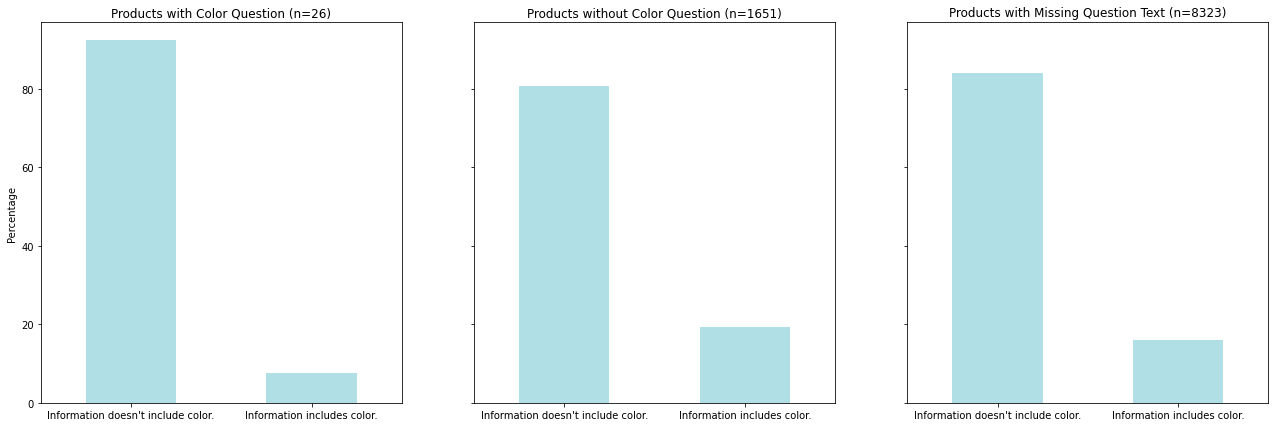

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), sharey = True)

df1.plot(ax=axes[0], kind='bar', color='powderblue')
df2.plot(ax=axes[1], kind = 'bar', color='powderblue')
df3.plot(ax=axes[2], kind = 'bar', color='powderblue')

axes[0].title.set_text(f"Products with Color Question (n={df[df['color_key'] == 'Question that mentions color'].shape[0]})")
axes[1].title.set_text(f"Products without Color Question (n={k})")
axes[2].title.set_text(f"Products with Missing Question Text (n={df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())].shape[0]})")


axes[0].set(xlabel=None, ylabel='Percentage')
for i in range(3):
  axes[i].set_xticklabels(["Information doesn't include color.", "Information includes color."], rotation=0)
plt.show()

**ITEM MODEL**

In [ ]:
# Generate a new column that shows if the product has a question that is related to color
df['model_key'] = df['ques_key_914' # Column that shows the keywords for questions
                     ].apply(lambda x: any(keyword in x for keyword in ['model', 'item']))

# replace 1 and 0 with their meanings
df['model_key'] = np.where(df['model_key'] == True, "Question that mentions model" , "Question that doesn't mention model")

# Generate a new column that shows there is a color detail in product information
df['model_no2'] = np.where(df['model_no'].isna() == True, "Information doesn't include model", "Information includes model")

# Print the values of "color_key"
df['model_key'].value_counts()

Question that doesn't mention model    9950
Question that mentions model             50
Name: model_key, dtype: int64

In [ ]:
# Create 3 dataframes 
# df1 => Products with Question Text
df1 = df[(df['model_key'] == 'Question that mentions model')]['model_no2'].value_counts(normalize=True).mul(100).sort_index()
# df2 => Products with Zero Question
k = df[(df['model_key'] != 'Question that mentions model')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))].shape[0]
df2 = df[(df['model_key'] != 'Question that mentions model')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))]['model_no2'].value_counts(normalize=True).mul(100).sort_index()
# df3 => Products with Missing Question Text
df3 = df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())]['model_no2'].value_counts(normalize=True).mul(100).sort_index()

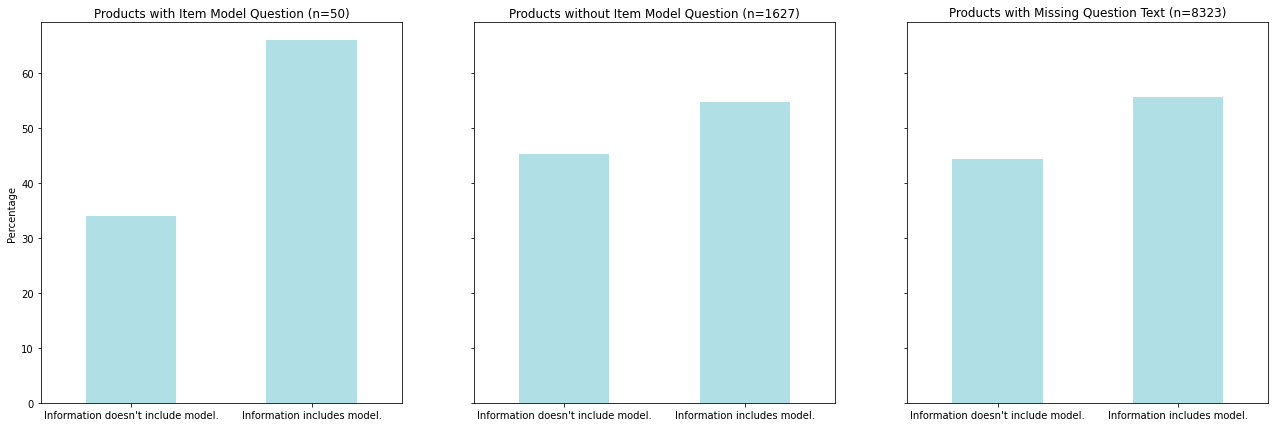

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), sharey = True)

df1.plot(ax=axes[0], kind='bar', color='powderblue')
df2.plot(ax=axes[1], kind = 'bar', color='powderblue')
df3.plot(ax=axes[2], kind = 'bar', color='powderblue')

axes[0].title.set_text(f"Products with Item Model Question (n={df[df['model_key'] == 'Question that mentions model'].shape[0]})")
axes[1].title.set_text(f"Products without Item Model Question (n={k})")
axes[2].title.set_text(f"Products with Missing Question Text (n={df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())].shape[0]})")


axes[0].set(xlabel=None, ylabel='Percentage')
for i in range(3):
  axes[i].set_xticklabels(["Information doesn't include model.", "Information includes model."], rotation=0)
plt.show()

**AGE**

In [ ]:
# Generate a new column that shows if the product has a question that is related to color
df['age_key'] = df['ques_key_914' # Column that shows the keywords for questions
                     ].apply(lambda x: any(keyword in x for keyword in ['old', 'age']))

# replace 1 and 0 with their meanings
df['age_key'] = np.where(df['age_key'] == True, "Question that mentions age" , "Question that doesn't mention age")

# Generate a new column that shows there is a color detail in product information
df['recom_age2'] = np.where(df['recom_age'].isna() == True, "Information doesn't include age", "Information includes age")

# Print the values of "color_key"
df['age_key'].value_counts()

Question that doesn't mention age    9913
Question that mentions age             87
Name: age_key, dtype: int64

In [ ]:
# Create 3 dataframes 
# df1 => Products with Question Text
df1 = df[(df['age_key'] == 'Question that mentions age')]['recom_age2'].value_counts(normalize=True).mul(100).sort_index()
# df2 => Products with Zero Question
k = df[(df['age_key'] != 'Question that mentions age')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))].shape[0]
df2 = df[(df['age_key'] != 'Question that mentions age')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))]['recom_age2'].value_counts(normalize=True).mul(100).sort_index()
# df3 => Products with Missing Question Text
df3 = df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())]['recom_age2'].value_counts(normalize=True).mul(100).sort_index()

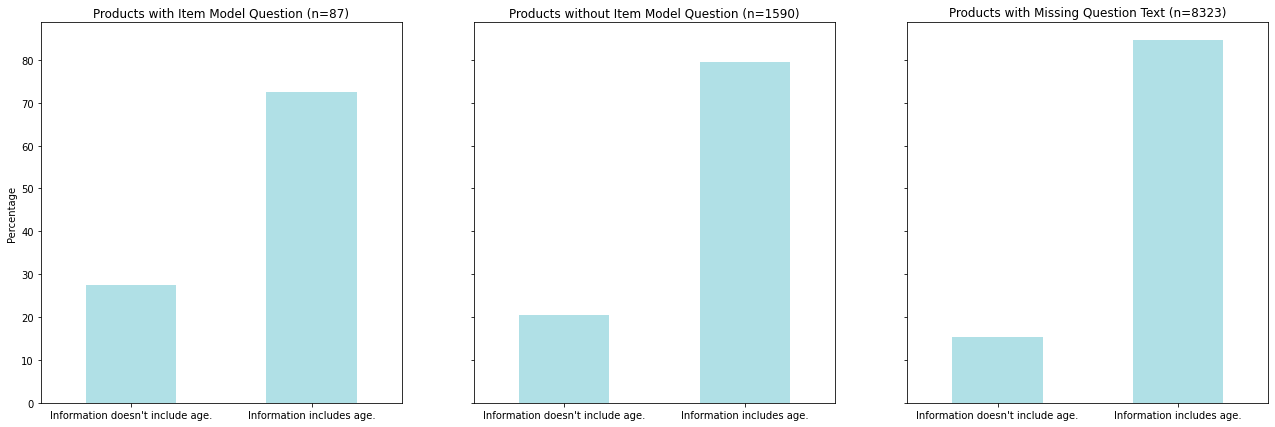

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), sharey = True)

df1.plot(ax=axes[0], kind='bar', color='powderblue')
df2.plot(ax=axes[1], kind = 'bar', color='powderblue')
df3.plot(ax=axes[2], kind = 'bar', color='powderblue')

axes[0].title.set_text(f"Products with Item Model Question (n={df[df['age_key'] == 'Question that mentions age'].shape[0]})")
axes[1].title.set_text(f"Products without Item Model Question (n={k})")
axes[2].title.set_text(f"Products with Missing Question Text (n={df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())].shape[0]})")


axes[0].set(xlabel=None, ylabel='Percentage')
for i in range(3):
  axes[i].set_xticklabels(["Information doesn't include age.", "Information includes age."], rotation=0)
plt.show()

**Battery**

In [ ]:
df['batt_key'] = df['ques_key_914'].apply(lambda x: any(keyword in x for keyword in ['batteries']))

# replace 1 and 0 with their meanings
df['batt_key'] = np.where(df['batt_key'] == True, "Question that mentions battery" , "Question that doesn't mention battery")

# Generate a new column that shows there is a color detail in product information
df['batt_inc2'] = np.where(df['batt_inc'].isna() == True, "Information doesn't include age", "Information includes age")

# Print the values of "color_key"
df['batt_key'].value_counts()

Question that doesn't mention battery    9986
Question that mentions battery             14
Name: batt_key, dtype: int64

In [ ]:
# Create 3 dataframes 
# df1 => Products with Question Text
df1 = df[(df['batt_key'] == 'Question that mentions battery')]['recom_age2'].value_counts(normalize=True).mul(100).sort_index()
# df2 => Products with Zero Question
k = df[(df['batt_key'] != 'Question that mentions battery')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))].shape[0]
df2 = df[(df['batt_key'] != 'Question that mentions battery')& ((df['customer_questions_and_answers'].isna()==False) |(df['number_of_answered_questions']==0))]['batt_inc2'].value_counts(normalize=True).mul(100).sort_index()
# df3 => Products with Missing Question Text
df3 = df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())]['batt_inc2'].value_counts(normalize=True).mul(100).sort_index()

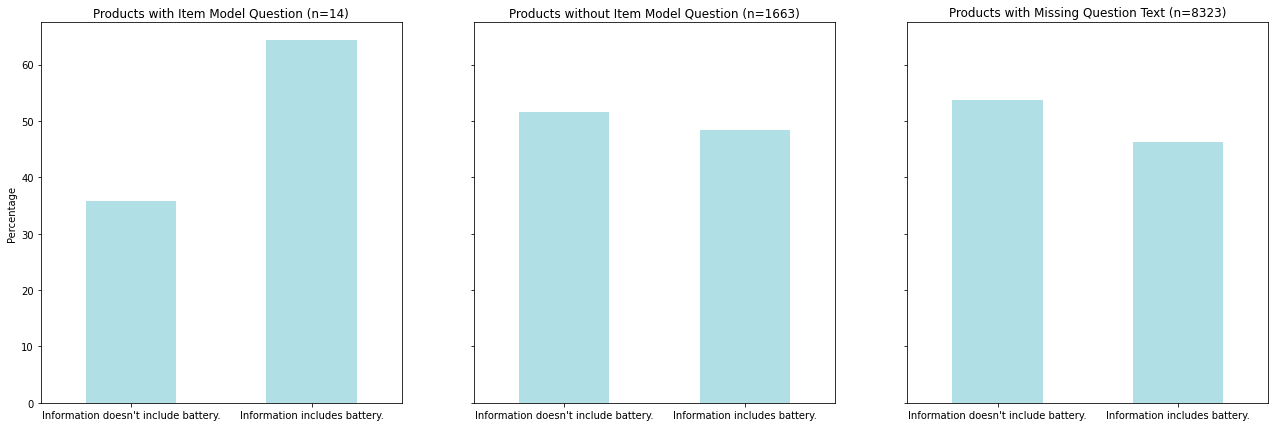

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), sharey = True)

df1.plot(ax=axes[0], kind='bar', color='powderblue')
df2.plot(ax=axes[1], kind = 'bar', color='powderblue')
df3.plot(ax=axes[2], kind = 'bar', color='powderblue')

axes[0].title.set_text(f"Products with Item Model Question (n={df[df['batt_key'] == 'Question that mentions battery'].shape[0]})")
axes[1].title.set_text(f"Products without Item Model Question (n={k})")
axes[2].title.set_text(f"Products with Missing Question Text (n={df[(df['number_of_answered_questions']>0)&(df['customer_questions_and_answers'].isna())].shape[0]})")


axes[0].set(xlabel=None, ylabel='Percentage')
for i in range(3):
  axes[i].set_xticklabels(["Information doesn't include battery.", "Information includes battery."], rotation=0)
plt.show()

In [ ]:
### NOTE:Drop the columns that were created in this section
# 'size_key', 'color_key', 'color_2', 'model_key', 'model_no2', 'age_key', 'recom_age2', 'batt_key', 'batt_inc2'
df = df.loc[:, :'Kite_q_topic']

# 14. Similarity Between Textual Data

In [ ]:
fig = make_subplots(rows=1, cols=6, shared_yaxes=True)

fig.add_trace(go.Box(y=df[(df['description'].isna()==False) & (df['product_information'].isna()==False)]['desc_info'], name ='Description & Information' ),row=1, col=1)
fig.add_trace(go.Box(y=df[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['desc_ques'], name='Description & Question'),row=1, col=2)
fig.add_trace(go.Box(y=df[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['desc_ans'], name='Description & Answer'),row=1, col=3)
fig.add_trace(go.Box(y=df[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['info_ques'], name= 'Information & Question'),row=1, col=4)
fig.add_trace(go.Box(y=df[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['info_ans'], name='Information & Answer'),row=1, col=5)
fig.add_trace(go.Box(y=df[(df['customer_questions_and_answers'].isna()==False)]['ques_ans'], name='Question & Answer'),row=1, col=6)

fig.update_layout(height=600, width=1200, title_text="Cosine Similarity Between Textual Data - BERT")
fig.show()

# 15. Sales Prediction

**NOTE:** OnlineReail.co.uk, being a direct competitor of Amazon.co.uk, have simliar sales trends to the latter, and we can take advantage of several tools available online for selers of that market place. That way, we can use https://amznscout.net/sales-estimator/ to estimate sales number.

As this is an initial analisys, we won't buy the service from AmznScout, but we can use some points to have a good estimation of our sample dataset saleS:

In [ ]:
sales_est = pd.DataFrame({'bsr': [1,50,100,250,500,1000,2000,3000,4000,6000,
                                  8000,10000,15000,20000,25000,30000,35000,
                                  40000],
                          'monthly_sales':[13367,5414,4230,2968,2129,1445,937,
                                           673,557,399,388,324,220,151,85,18,1,
                                           1]})
fig = px.scatter(sales_est, x='bsr', y='monthly_sales')
fig.show()

**Note:** As we can see, we can assume as an exponential function, but fitting a curve is not possible due to stack overflow. In order to conserve the business intepretability of this solution, we decided to create a function linear by parts, connecting the data points we have. We understand this might be an overestimation of sales, but this can be improved later.

In [ ]:
def sales_pred(x_data, y_data, x):
  try:
    for i in range(len(x_data)):
      x1 = x_data[i]
      x2 = x_data[i+1]
      y1 = y_data[i]
      y2 = y_data[i+1]
      if x1 <= x <= x2:
        slope = (y2 - y1)/(x2 - x1)
        y_intercept = y1 - slope * x1
        y = slope * x + y_intercept
        return round(y)
  except: # when more than our last point, return the last point
    return y_data.iloc[-1]


In [ ]:
df['predicted_sales'] = df['best_seller_rank'].apply(lambda x: sales_pred(sales_est['bsr'],
                                                                          sales_est['monthly_sales'], x))

df['predicted_revenue'] = df['predicted_sales'] * df['price']

df[['best_seller_rank', 'price', 'predicted_sales', 'predicted_revenue']]

,best_seller_rank,price,predicted_sales,predicted_revenue
0,52854.0,3.42,1,3.42
1,169625.0,16.99,1,16.99
2,54147.0,9.99,1,9.99
3,852720.0,39.99,1,39.99
4,84256.0,32.19,1,32.19
...,...,...,...,...
9995,228886.0,22.95,1,22.95
9996,454452.0,39.99,1,39.99
9997,496947.0,43.99,1,43.99
9998,1304952.0,49.81,1,49.81


In [ ]:
# create a smaller DF to be easier to work with
buckets_df = df[['best_seller_rank', 'price', 'predicted_sales', 'predicted_revenue']]

buckets_df = buckets_df.sort_values('best_seller_rank')

buckets_df['cumulative'] = buckets_df['predicted_revenue'].cumsum()

buckets_df.head()

,best_seller_rank,price,predicted_sales,predicted_revenue,cumulative
9315,14.0,9.98,11257,112344.86,112344.86
9516,28.0,8.00,8985,71880.00,184224.86
709,29.0,18.98,8822,167441.56,351666.42
5390,33.0,4.25,8173,34735.25,386401.67
9338,37.0,6.99,7524,52592.76,438994.43


In [ ]:
# montlhy expected revenue:
buckets_df['cumulative'][-1:]

9640    6.566353e+06
Name: cumulative, dtype: float64

With approximately 6 million in revenue, we can divide the smaple products in 6 buckets of 1 million approx. |expected revenue:

In [ ]:
buckets_df.head()

,best_seller_rank,price,predicted_sales,predicted_revenue,cumulative
9315,14.0,9.98,11257,112344.86,112344.86
9516,28.0,8.00,8985,71880.00,184224.86
709,29.0,18.98,8822,167441.56,351666.42
5390,33.0,4.25,8173,34735.25,386401.67
9338,37.0,6.99,7524,52592.76,438994.43


In [ ]:
def generate_buckets(cumulative_column, bucket_size):
  ''' Function that return bucket number based on cumulative_column and 
  bucket_size in equal splits.'''
  bucket = cumulative_column/bucket_size
  return int(np.trunc(bucket))

# change the number of buckets if needed:
number_of_buckets = 6
bucket_size = buckets_df['cumulative'][-1:]/number_of_buckets

buckets_df['bucket'] = buckets_df['cumulative'].apply(lambda x: generate_buckets(x,
                                                           bucket_size))

buckets_df.sample(10)


,best_seller_rank,price,predicted_sales,predicted_revenue,cumulative,bucket
3897,296861.0,13.990000,1,13.990000,6.445240e+06,5
424,370230.0,6.000000,1,6.000000,6.469678e+06,5
9195,226201.0,19.097724,1,19.097724,6.421886e+06,5
8054,434559.0,54.900000,1,54.900000,6.486988e+06,5
9090,154769.0,18.470000,1,18.470000,6.392484e+06,5
1715,50736.0,13.290000,1,13.290000,6.338896e+06,5
8317,29633.0,3.500000,23,80.500000,6.309675e+06,5
9192,35614.0,9.990000,1,9.990000,6.331435e+06,5
4987,45597.0,25.785000,1,25.785000,6.336766e+06,5
6756,89762.0,9.990000,1,9.990000,6.357290e+06,5


In [ ]:
## append buckets to main dataframe

In [ ]:
df['bucket'] = buckets_df.sort_index()['bucket']

# The Correlation Between Numeric Features

In [ ]:
# Generate the list of numeric features
num_features  = list(df.select_dtypes(include=['int', 'float']).columns)

# The length of num_features
print(len(num_features))

68


<function matplotlib.pyplot.show(*args, **kw)>

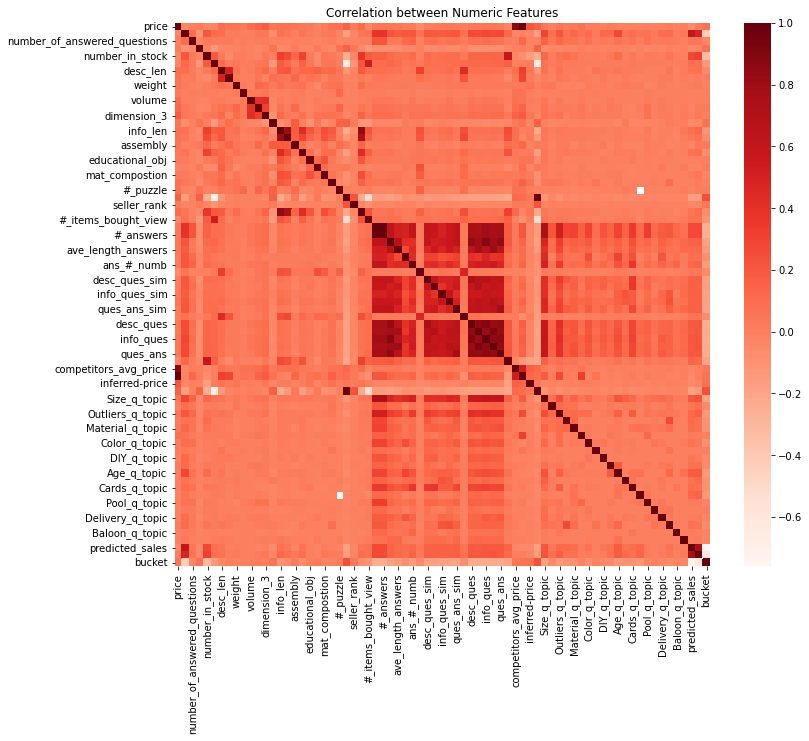

In [ ]:
plt.subplots(figsize=(12,10))
ax = sns.heatmap(df.corr(), cmap="Reds")
ax.set_title("Correlation between Numeric Features")
plt.show

In [ ]:
# define a function to create scatter plots
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=1, hspace=1)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y='number_of_answered_questions', data=df, alpha=1)
        ax.set(xlabel=col, ylabel='#_ques')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

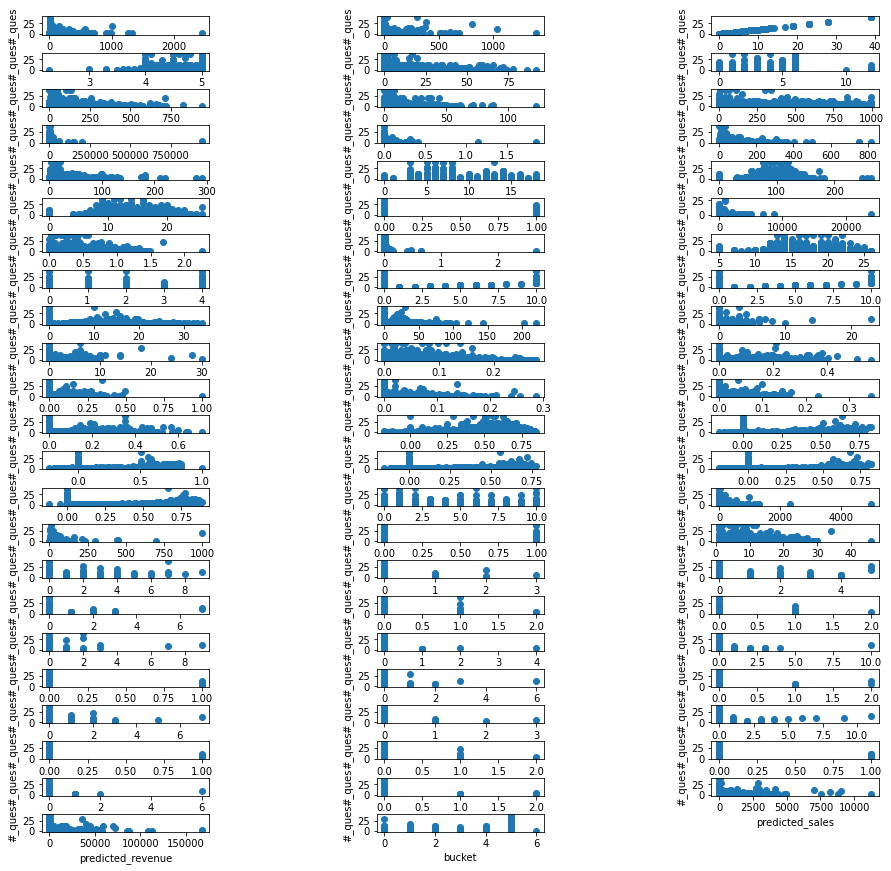

In [ ]:
scatterplots(num_features, ncol=3, figsize=(15, 15))

In [ ]:
df.shape

(10000, 142)

In [ ]:
session_info.show()

In [ ]:
# Download the data
df.to_csv('df_after_eda.csv')

In [2]:
k =pd.read_csv('df_test.csv')

In [5]:
k.shape

(10000, 65)

In [4]:
k.head()

,Unnamed: 0,description_clean,question_list,ques_topic_list_2,topic_0,prob_0,prob_1,prob_2,prob_3,prob_4,...,coded_10,coded_11,coded_12,coded_13,coded_14,coded_15,coded_16,coded_17,coded_18,coded_19
0,0,product description hornby catalogue box conta...,['Does this catalogue detail all the previous ...,[0],0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,size name large funky buys large christmas hol...,['can you turn off sounds'],[8],0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,big classic toy train set track carriage light...,"['What is the gauge of the track', ' what is t...","[2, 2]",2,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,hornby gauge br hawks worth rd class,NaN,[],2,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,product description hornby railroad gil den lo...,NaN,[],2,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
